In [62]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random
import time

In [63]:
path = "data/data2.csv"
def getDf():
    df_raw = pd.read_csv(path)
    return df_raw.loc[df_raw["success"] >= 1]
df = getDf()
print(df)

   dist   rpm  ang  success
0  3.50  3000   55        1
1  3.10  2950   55        1
2  2.50  2770   55        1
3  1.20  2400   65        1
4  1.31  2540   65        1
5  0.67  2420   70        1
6  0.85  2400   70        1
7  1.80  2550   55        1
8  2.88  2950   55        1


        3        2
-157.4 x + 1159 x - 2451 x + 4123 55
        3         2
-5.867 x + 255.7 x + 658.7 x + 1252 65


C:\Users\goldw\AppData\Local\Temp\ipykernel_30724\2987834488.py:28: RankWarning: Polyfit may be poorly conditioned
  plotGraph("dist", "rpm", "ang")
C:\Users\goldw\AppData\Local\Temp\ipykernel_30724\2987834488.py:28: RankWarning: Polyfit may be poorly conditioned
  plotGraph("dist", "rpm", "ang")


       3         2
-1054 x + 310.9 x + 1252 x + 1759 70


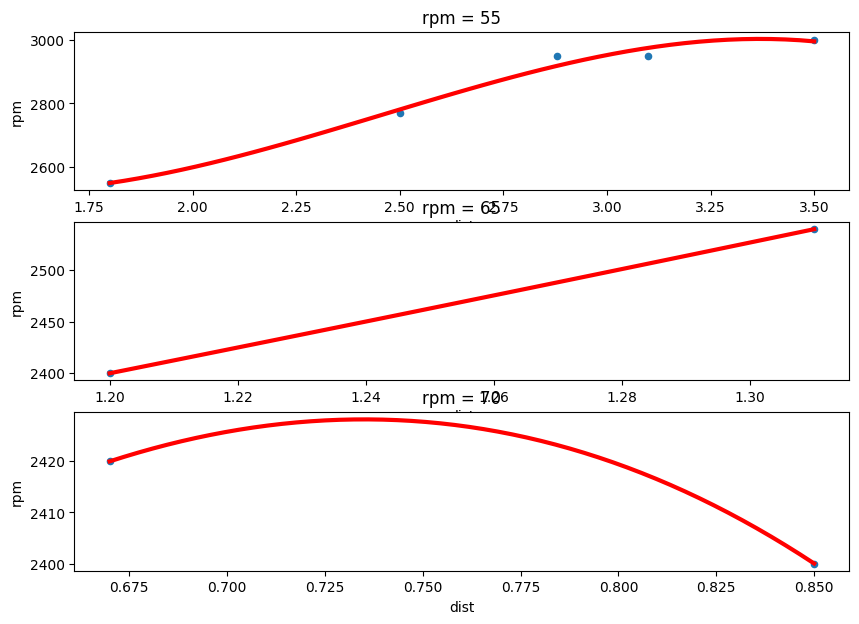

In [67]:
# y2 parameter yang dipisah ke beberapa graph
def plotGraph(x, y1, y2):
    df = getDf()
    y2s = df[y2].unique()
    y2s_len = len(y2s)

    # if(y2s_len <= 1):
    #     print("Not Enough Data")
    #     return
    if(y2s_len == 0):
        return "No Data"
    if(y2s_len > 1):
        fig, axes = plt.subplots(nrows=y2s_len, figsize=(10,7))
        for i in range(0, y2s_len):
            df_y2 = df.loc[df[y2] == y2s[i]]
            df_y2.plot(ax=axes[i], kind="scatter", x=x, y=y1)
            model = np.poly1d(np.polyfit(df_y2["dist"], df_y2[y1], 2))
            print(model, y2s[i])
            polyline = np.linspace(df_y2[x].min(), df_y2[x].max())
            axes[i].plot(polyline, model(polyline), color="red", lw=3)
            axes[i].set_title("rpm = "+str(y2s[i]))
    else:
        df.plot(kind="scatter", x=x, y=y1)
        model = np.poly1d(np.polyfit(df["dist"], df[y1], 5))
        polyline = np.linspace(df[x].min(), df[x].max())
        plt.plot(polyline, model(polyline), color="red", lw=3)
        plt.title("rpm = " + str(y2s[0]))
plotGraph("dist", "rpm", "ang")

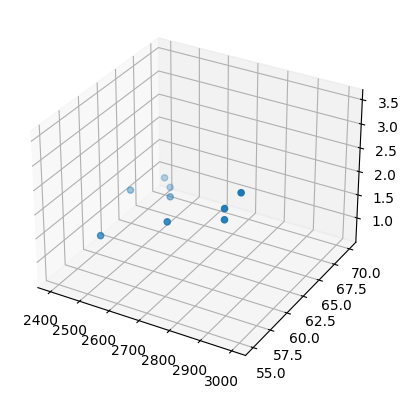

In [65]:
def func(xy, a, b, c, d, e, f):
    x, y = xy
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y
# "dist", "rpm", "ang"
# popt, pcov = curve_fit(func, (x, y), z)
ax = plt.axes(projection='3d')
ax.scatter3D(df["rpm"], df["ang"], df["dist"])

In [66]:
def f(x):
    return -88.54*x**2 + 756.3*x + 1438
def g(x):
    return -87.88*x**2 + 752.2*x + 1444
def h(x):
    return -31.69*x**2 + 594.4*x + 1779
def f2(x):
    return -87.71*x**2 + 751.2*x + 1445
def g2(x):
    return -31.69*x**2 + 594.4*x + 1779
def h2(x):
    return -111.7*x**2 + 889.4*x + 1280
    
print(f(2.34))
print(g(2))
print(h(2))
print(f2(1.88) , g2(1.88))
print(h2(2.88))

2722.9323759999997
2596.88
2841.04
2547.253776 2784.466864
2914.9875199999997
